## Business Objective:
***
**To Predict the Apple stock market price for neat 30 Days.**
***
There ar Open, High, Low, Close, Adjested Close and Volume (of stocks sold) has been given for each day starting from 2012 to 2019 for each day.

**Objectives:**

Split the last year into a test set- Can you build a Model for stock price?

Find Short Mid and Long term trends?

Understand how it is impacted from external factors or any other big external events.

Forcast for next 30 days?

#### 1.Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### 2. Import DataSet

In [ ]:
apple_stock_price = pd.read_csv("AAPL.csv", 
                                index_col=0, 
                                parse_dates=True, 
                                squeeze= True)
apple_stock_price

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300


**observations:**
***
We can see that there are 2011 observations with 7 columns i.e Date, Open, High, Low, Close, Adj.Close and Volume (of stocks traded). 

we can see that there are missing values in the weekends and some other days.

To do further, we need to make Date column as Data_Time index.

Now we need to select our target column. In the problem statement it is clearly mentioned that we need to predict ext 30 days stock price, so we can not select volume column. 

Adjested close column is used for calculating Returns at any point of time. We can not use this for price prediction since adjestd close price involves dividends which are not constant over a period of time.

High and Low price cannot be choosen since we don't know at what time these values show up.

Compared to Open price, Close price is very important since open price has no prior data on that day so we can not see the moment of price on that day.

So we can take "close price" as our target for forecasting!

In [ ]:
df_close = apple_stock_price[['Close']]
df_close.head()

,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143


In [ ]:
# log transform of the data
df_close['log_close'] = np.log(df_close['Close'])
df_close['Date']  = df_close.index
df_close.head()

,Close,log_close,Date
Date,,,
2012-01-03,58.747143,4.073243,2012-01-03
2012-01-04,59.062859,4.078602,2012-01-04
2012-01-05,59.718571,4.089643,2012-01-05
2012-01-06,60.342857,4.100043,2012-01-06
2012-01-09,60.247143,4.098455,2012-01-09


In [ ]:
df_close['day']     = df_close.index.day
df_close['week']    = df_close.index.week
df_close['month']   = df_close['Date'].dt.strftime("%b")
df_close['quarter'] = df_close.index.quarter
df_close['year']    = df_close['Date'].dt.strftime("%Y").astype("int")
df_close.head()

,Close,log_close,Date,day,week,month,quarter,year
Date,,,,,,,,
2012-01-03,58.747143,4.073243,2012-01-03,3,1,Jan,1,2012
2012-01-04,59.062859,4.078602,2012-01-04,4,1,Jan,1,2012
2012-01-05,59.718571,4.089643,2012-01-05,5,1,Jan,1,2012
2012-01-06,60.342857,4.100043,2012-01-06,6,1,Jan,1,2012
2012-01-09,60.247143,4.098455,2012-01-09,9,2,Jan,1,2012


In [ ]:
# creating a time stamp for modeling
df_close['t'] = pd.read_csv("AAPL.csv").set_index(np.arange(1,2012,1)).index
df_close['t_squared'] = df_close['t'] * df_close['t']
# df_close      = pd.concat([df_close, pd.get_dummies(df_close['year'])], axis=1)
df_close.head()

,Close,log_close,Date,day,week,month,quarter,year,t,t_squared
Date,,,,,,,,,,
2012-01-03,58.747143,4.073243,2012-01-03,3,1,Jan,1,2012,1,1
2012-01-04,59.062859,4.078602,2012-01-04,4,1,Jan,1,2012,2,4
2012-01-05,59.718571,4.089643,2012-01-05,5,1,Jan,1,2012,3,9
2012-01-06,60.342857,4.100043,2012-01-06,6,1,Jan,1,2012,4,16
2012-01-09,60.247143,4.098455,2012-01-09,9,2,Jan,1,2012,5,25


***
**df_close is our finel data frame for Apple Stock Market Analysis!**
***

#### 3.Exploratory Data Analysis

##### 3.1 Data Checking

In [ ]:
apple_stock_price.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
apple_stock_price.duplicated().sum()

0

In [ ]:
apple_stock_price.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
apple_stock_price.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**Observations:**

In the given data set there are NO Nan Values,

NO Null values and NO duplicated rows!

##### 3.2 Data Understanding

*We analyse Close price in Montly level, Qurter level and Yearly level analysis*

*Close price is given in Day wise.*

In [ ]:
# df_close['Date']  = df_close.index
# df_close

In [ ]:
# df_close['day']     = df_close.index.day
# df_close['week']    = df_close.index.week
# df_close['month']   = df_close['Date'].dt.strftime("%b")
# df_close['quarter'] = df_close.index.quarter
# df_close['year']    = df_close['Date'].dt.strftime("%Y")
# df_close

In [ ]:
df = df_close.groupby(['year', 'month'])[['Close']].mean()
df

Close
year month            
2012 Apr     86.571857
     Aug     91.813727
     Dec     76.007857
     Feb     71.081572
     Jan     61.225428
...                ...
2019 Mar    183.293810
     May    191.273637
     Nov    262.520503
     Oct    235.286521
     Sep    217.994999

[96 rows x 1 columns]

**3.2.1 Day wise Close price Analysis:**

In [ ]:
df_close.describe(include='float').transpose()

,count,mean,std,min,25%,50%,75%,max
Close,2011.0,126.741235,50.578369,55.790001,86.202145,113.050003,165.245002,291.519989
log_close,2011.0,4.765755,0.389596,4.021595,4.456695,4.727830,5.107429,5.675109


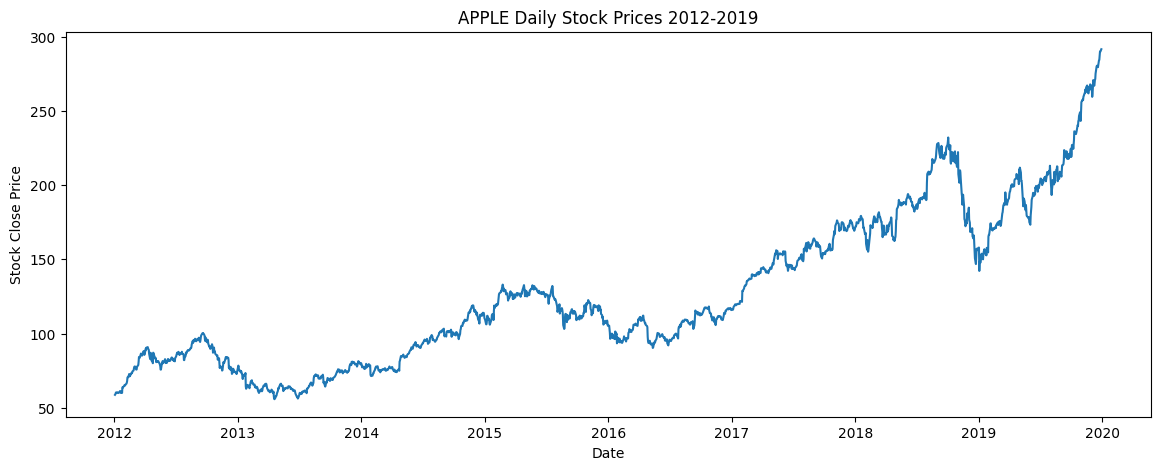

In [ ]:
# Line plot for analysing overall trend
plt.figure(figsize=(14,5))
sns.lineplot(x = df_close.index, y = df_close['Close'])
plt.title("APPLE Daily Stock Prices 2012-2019")
plt.xlabel("Date")
plt.ylabel("Stock Close Price")
plt.show()

This plot shows an Uptrend! 

In this plot we can not see seasonality but it does not mean there is no Seasonality.

We have to look at other plots to see other components like Cycles, Seasonality etc.

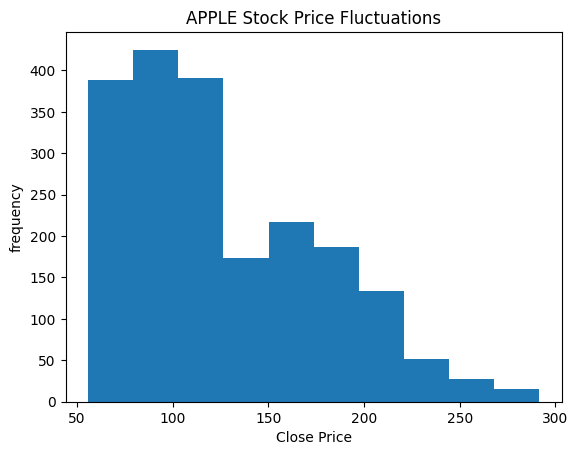

In [ ]:
# Histogram to see overall fluctuations
plt.hist(df_close.Close)
plt.xlabel("Close Price")
plt.ylabel("frequency")
plt.title("APPLE Stock Price Fluctuations")
plt.show()

Data is Left skewed and Close price is mostly between 50-150.

And it indicates that the price growing slowly over time...it means long term investments in these stocks will be benifitial!

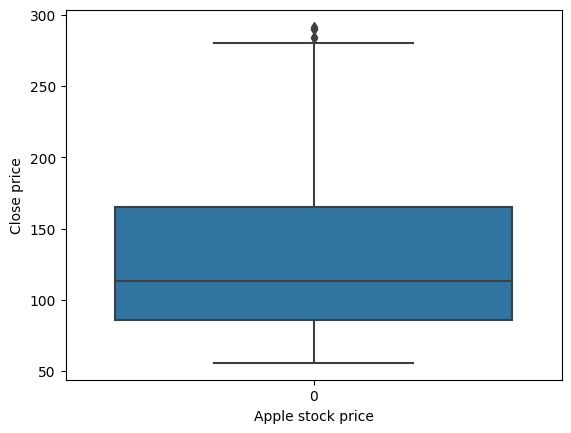

In [ ]:
# Boxplot to see 
sns.boxplot(df_close.Close)
plt.xlabel("Apple stock price")
plt.ylabel("Close price")
plt.show()

*Observations:*

In  the above plot Medien is at 120 and two extream values can be seen!

**3.2.2 Month wise Analysis**

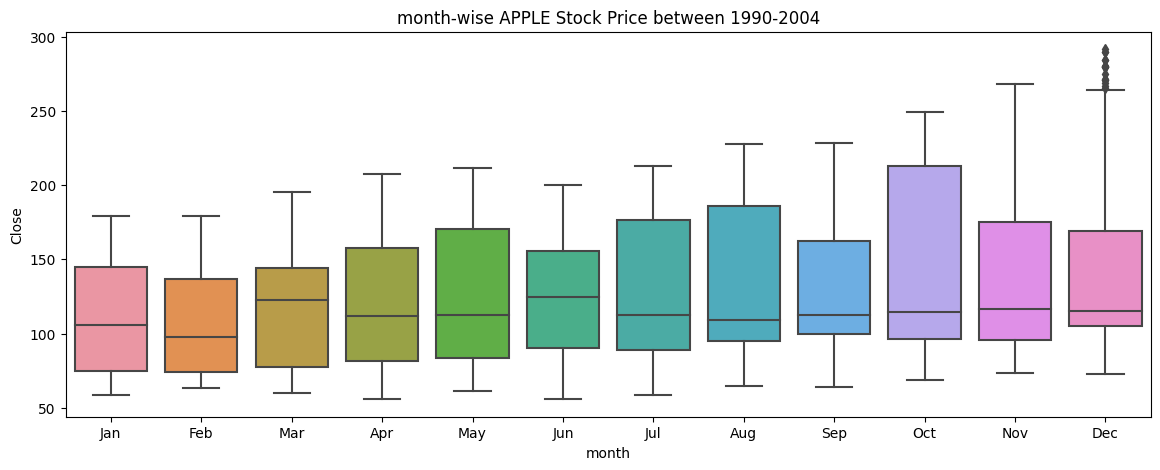

In [ ]:
# month wise Stock Price distribution
plt.figure(figsize=(14,5))
sns.boxplot(data= df_close, x= 'month', y='Close')
plt.title("month-wise APPLE Stock Price between 1990-2004")
plt.show()

From the above we can see month wise stock price patterns.

For Oct month every year, the stock price is Right Skewed with High varience, means most of the peice values are above the median price and at the same time there is huge fluctuations(risk associated!).

We can see that Highest closing prices are occuring in NOV and Dec Months (see Outliers in Dec)!

In [ ]:
year_month_stock_prices = pd.pivot_table(data = df_close,
                                        values='Close',
                                        index = 'year', 
                                        columns='month').fillna(0).astype("int")
year_month_stock_prices

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
2012,86,91,76,71,61,85,82,82,80,80,90,97
2013,59,69,79,65,71,61,60,63,63,74,72,68
2014,77,98,112,75,76,95,91,76,86,113,101,100
2015,127,113,111,125,110,125,127,125,128,118,113,112
2016,106,107,114,95,98,98,96,104,94,110,115,110
2017,142,159,171,133,119,148,147,140,152,172,157,157
2018,169,213,164,167,174,190,188,174,185,191,220,222
2019,200,204,275,171,154,205,192,183,191,262,235,217


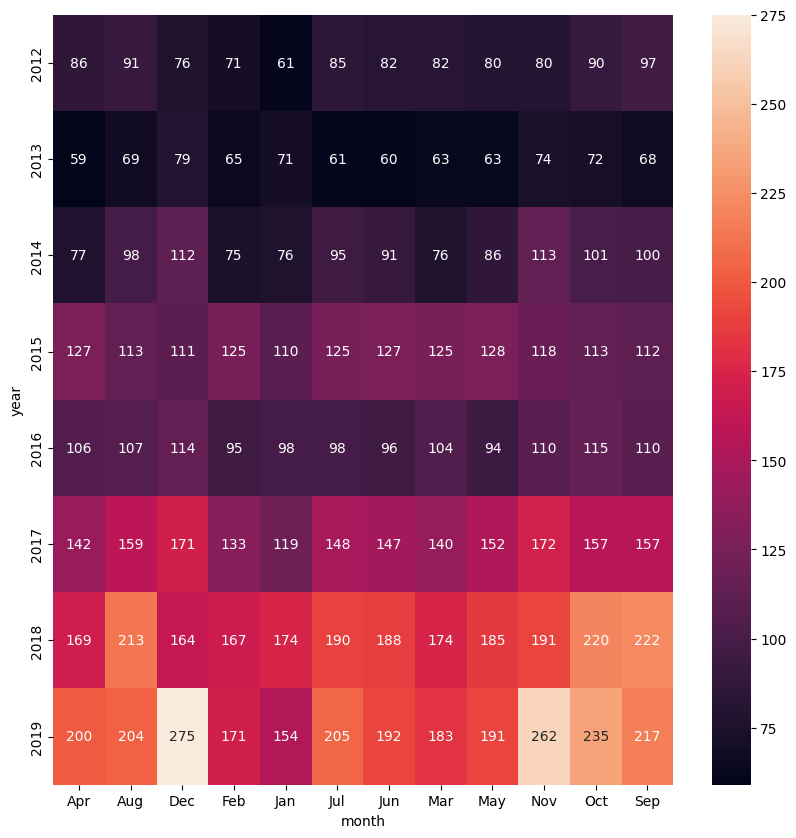

In [ ]:
# Heatmap to see patterns
plt.figure(figsize=(10,10))
sns.heatmap(data=year_month_stock_prices, 
            annot=True, 
            fmt='g')
plt.show()

*Patterns in Heatmap:*

There is a huge increment in the year 2015 compared to 2014.(Why?)

And again there is a rapid increment in the year 2017(in all months) compared to previours years.(why?)

**3.2.3 Quarter wise Analysis**

In [ ]:
# To look for quarter wise seasonality

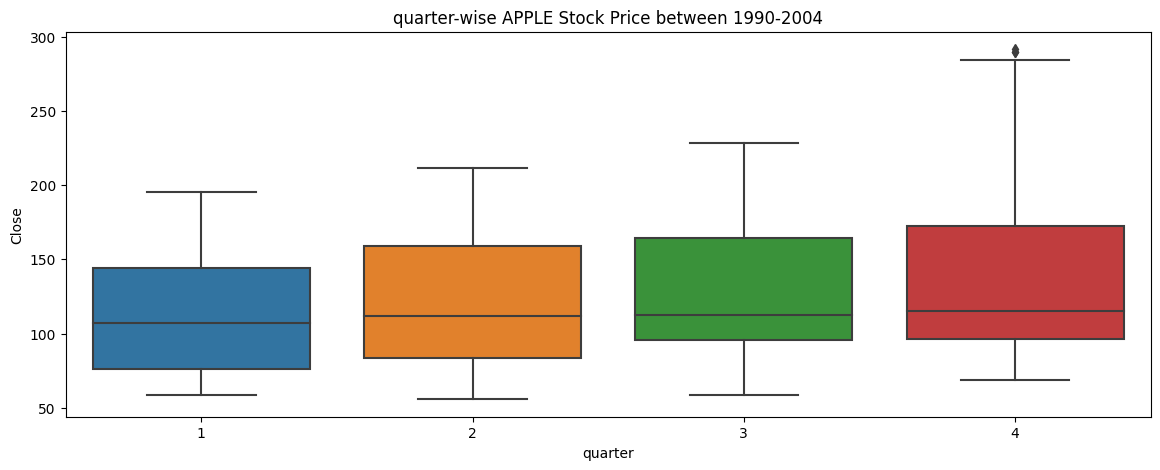

In [ ]:
# Quarter wise stock price distribution
plt.figure(figsize=(14,5))
sns.boxplot(data= df_close, x= 'quarter', y='Close')
plt.title("quarter-wise APPLE Stock Price between 1990-2004")
plt.show()

Observation:

By looking at quarter 4, which is highly right skewed compared to other quarters, we can infer that the stock price is high in he 4 th quarter!

In [ ]:
year_quarter_stock_prices = pd.pivot_table(data = df_close,
                                        values='Close',
                                        index = 'year', 
                                        columns='quarter').fillna(0).astype("int")
year_quarter_stock_prices

quarter,1,2,3,4
year,,,,
2012,71,83,91,82
2013,66,61,66,75
2014,76,85,98,108
2015,120,127,117,114
2016,99,99,105,113
2017,131,147,155,167
2018,172,181,208,193
2019,169,194,209,256


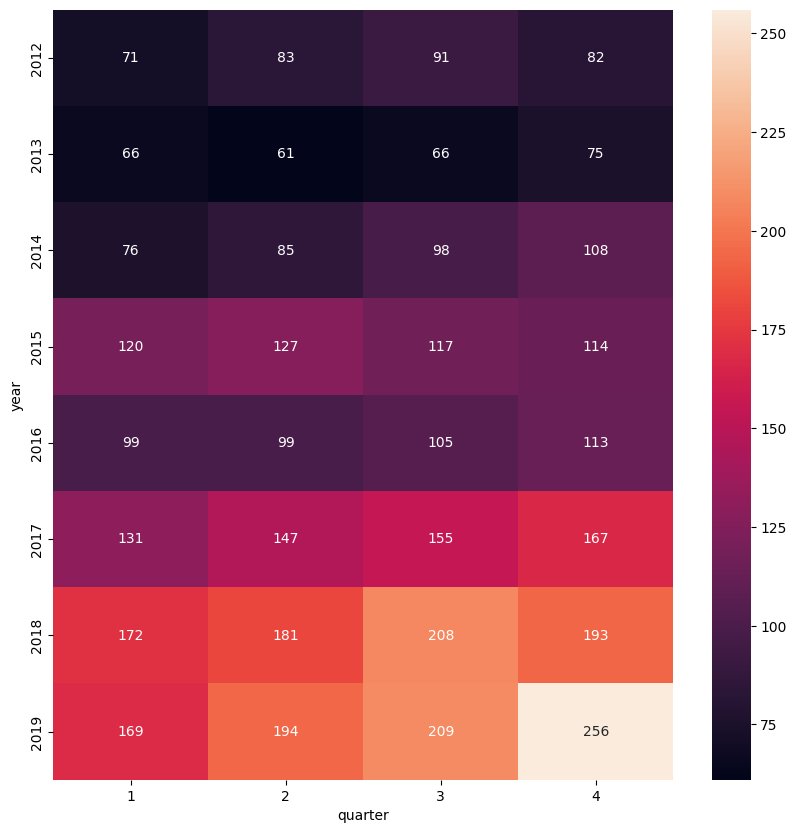

In [ ]:
# Heatmap to see patterns in quarter wise data
plt.figure(figsize=(10,10))
sns.heatmap(data=year_quarter_stock_prices, 
            annot=True, 
            fmt='g')
plt.show()

*Observations*

From the above heat map, in the 4th quarter the price is alwayes high compared to other quarters over the years. This suggests a seasonality of peiod 4 quarters (1 year).

**3.2.4 Year wise Analysis**

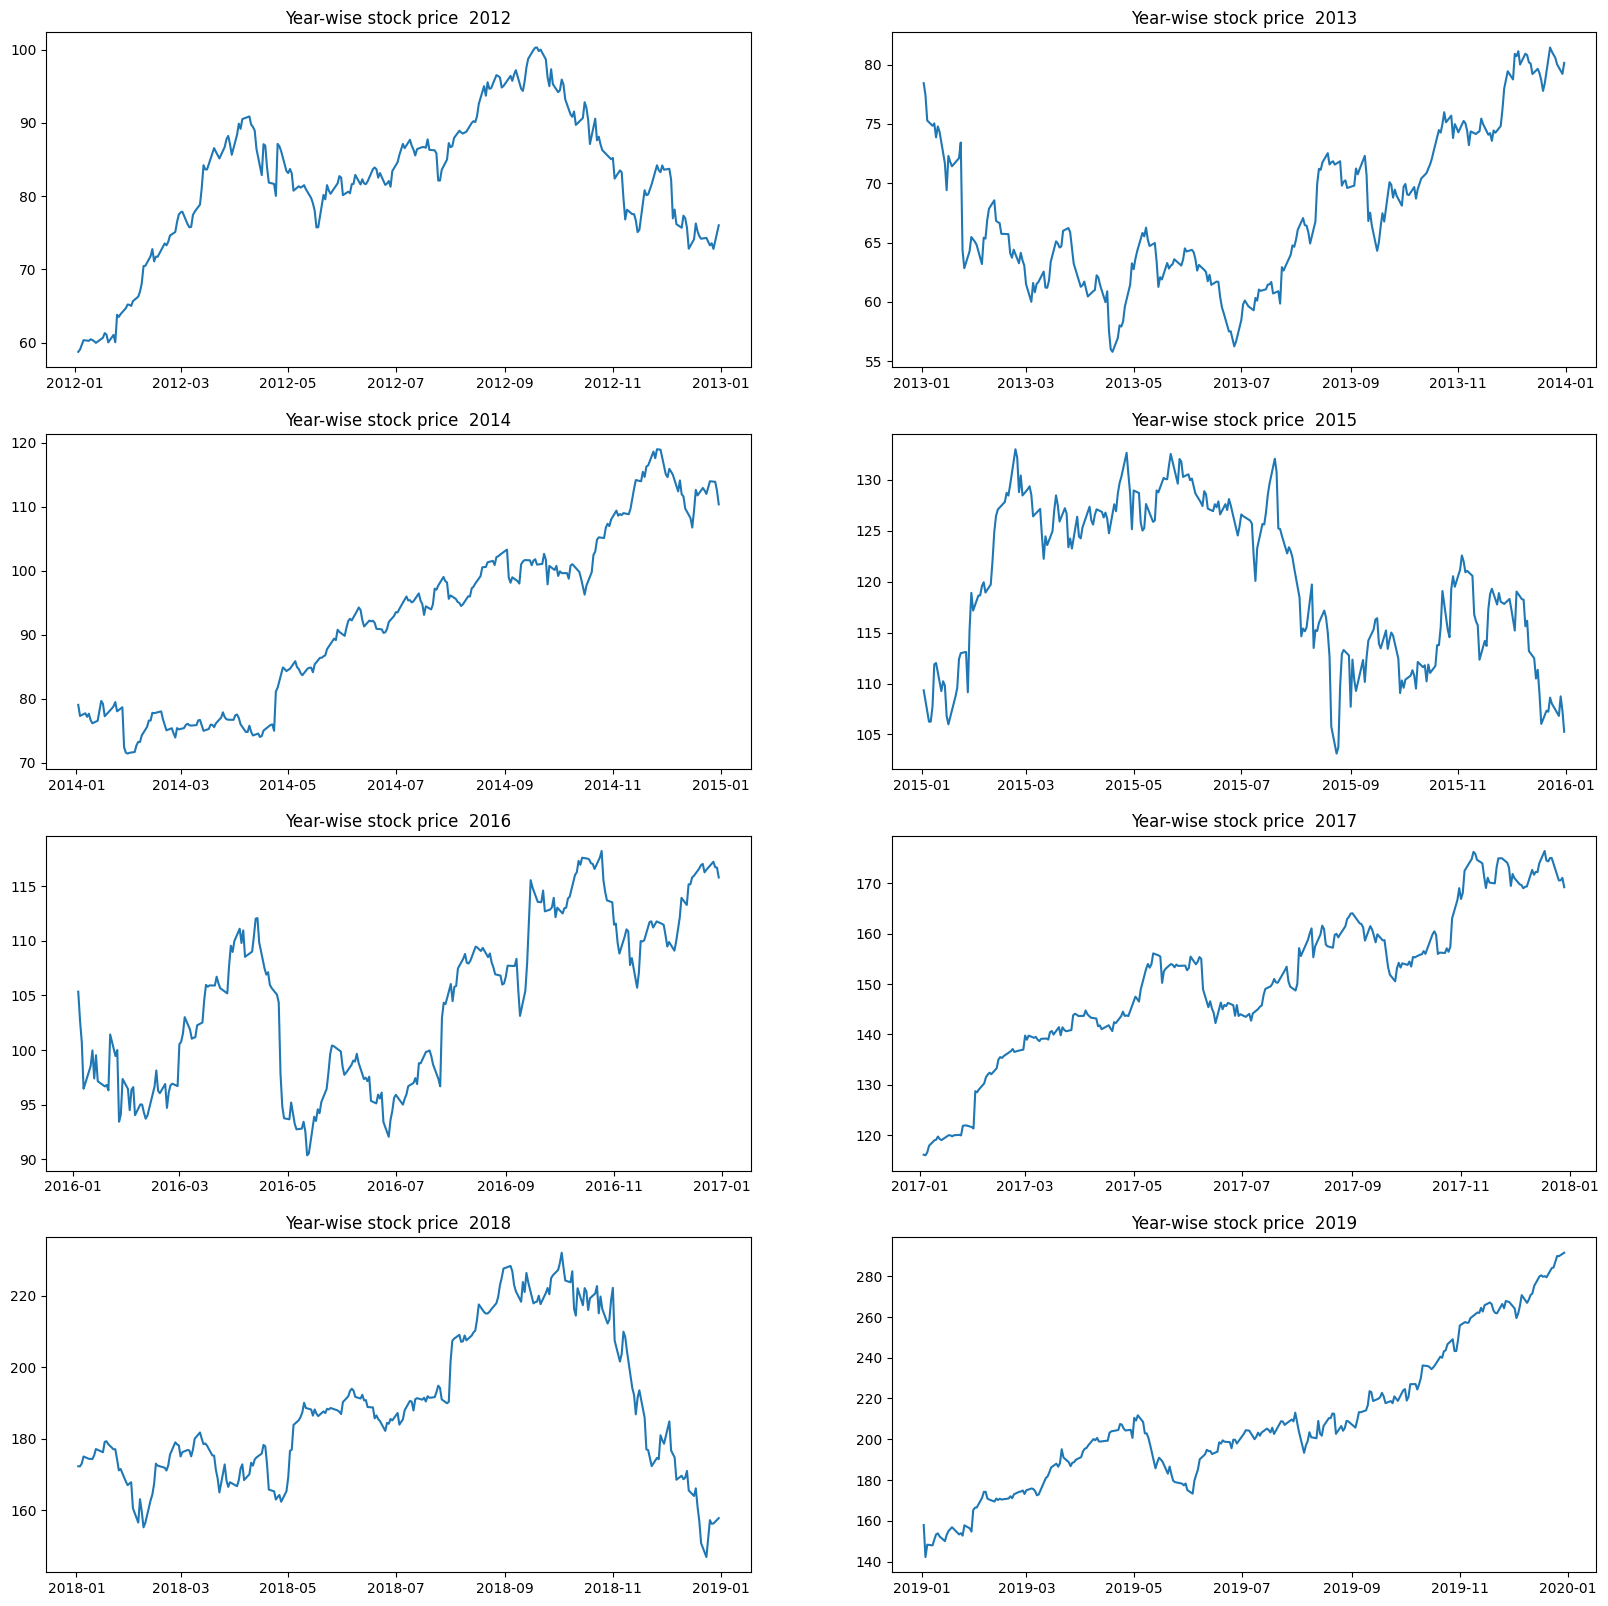

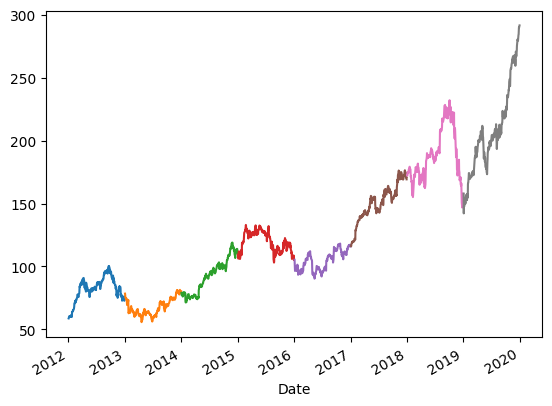

In [ ]:
# year wise close price
fig, axes = plt.subplots(4, 2, figsize=(20,20), dpi=100)
axes[0,0].plot(df_close['2012'].Close)
axes[0,0].set_title("Year-wise stock price  2012")

axes[0,1].plot(df_close['2013'].Close)
axes[0,1].set_title("Year-wise stock price  2013")

axes[1,0].plot(df_close['2014'].Close)
axes[1,0].set_title("Year-wise stock price  2014")

axes[1,1].plot(df_close['2015'].Close)
axes[1,1].set_title("Year-wise stock price  2015")

axes[2,0].plot(df_close['2016'].Close)
axes[2,0].set_title("Year-wise stock price  2016")

axes[2,1].plot(df_close['2017'].Close)
axes[2,1].set_title("Year-wise stock price  2017")

axes[3,0].plot(df_close['2018'].Close)
axes[3,0].set_title("Year-wise stock price  2018")

axes[3,1].plot(df_close['2019'].Close)
axes[3,1].set_title("Year-wise stock price  2019")
plt.show()

df_close.groupby(['year'])['Close'].plot()
plt.show()

**There is no pattern repeating over years so it seems there is No year wise seasonality!**

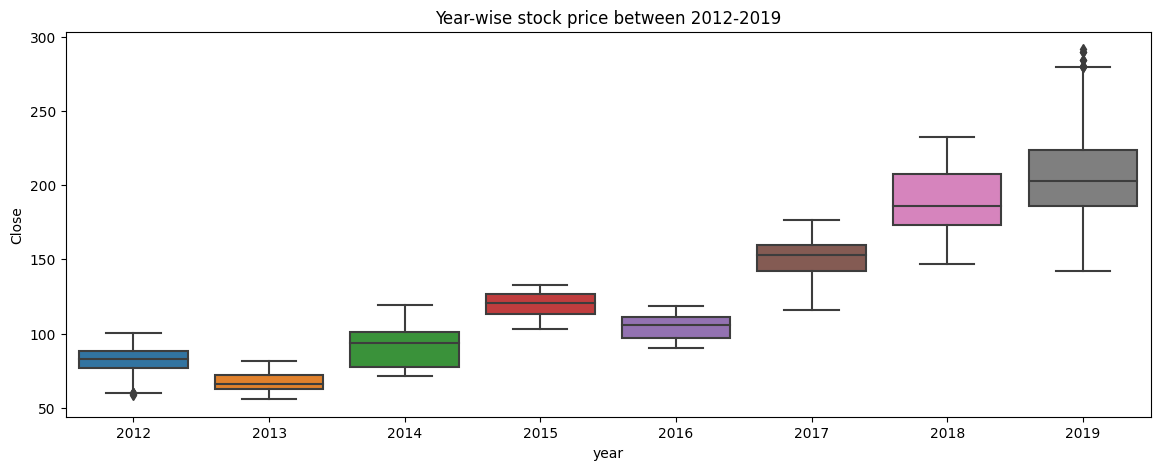

In [ ]:
# year wise price distribution
plt.figure(figsize=(14,5))
sns.boxplot(data= df_close, x= 'year', y='Close')
plt.title("Year-wise stock price between 2012-2019")
plt.show()

From the above year wise boxplots, Median value is increasing over years, so there is an overall Uptrend present. And the IQR widths are also increasing over years suggests that theres is an incresing Varience.

It means overall stock price is increasing over years and at the same time the risk(varience) is also increasing!

(see 2018, 2019 boxplots).

**3.2.5 Decomposing the stock price Time series**

There are two ways we can decompose the time series the first one is by assuming Additive model

(Yt = Trend + Seasonality + Noice)

and the other one is by assuming Multiplicative model (Yt = Trend * Seasonality * Noice) of the given time series.

we will see both...

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df_close['2012'].shape

(250, 10)

The period of the sesonality is 250 days!

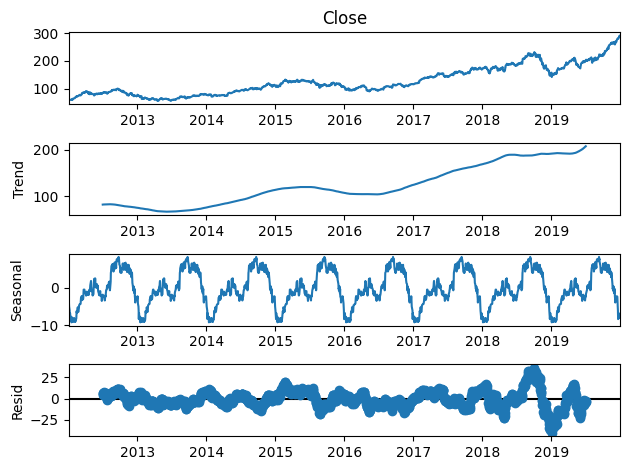

In [ ]:
# Additive model decomposition (Yt = Trend + Seasonality + Noice)
decompose_additive = seasonal_decompose(df_close['Close'], period=250, model='additive' )
decompose_additive.plot();
plt.rcParams['figure.figsize'] = (12, 8);

In [ ]:
decompose_additive.resid.mean()

-0.32601697905728994

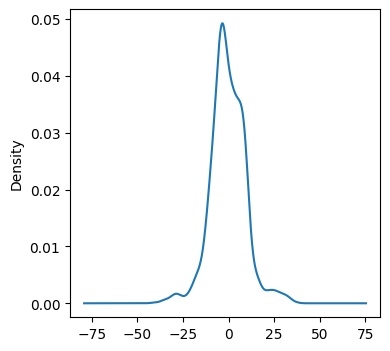

In [ ]:
plt.figure(figsize=(4,4))
decompose_additive.resid.plot(kind='kde')
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox as ljung

In [ ]:
ljung_p = np.mean(ljung(x=decompose_additive.resid.dropna()))[1].round(3)
print("Ljung Box, p value:", ljung_p, ", Residuals are unAutocorrelated" if ljung_p>0.05 else ", Residuals are Autocorrelated")
# ljung_p

Ljung Box, p value: 0.0 , Residuals are Autocorrelated


**observations:**

In the additive decomposition, the trend is linear and the residuals shows a wave pattern, 

which indicates some kind of Autocorrelation among the residuals!

To test for Autocorrelation among residuals we used ljung-box test!

And the test resulted Autocorrelation among the residuals!

It indicates an Exogeneous variable/ higher order models needed to explain the time series!



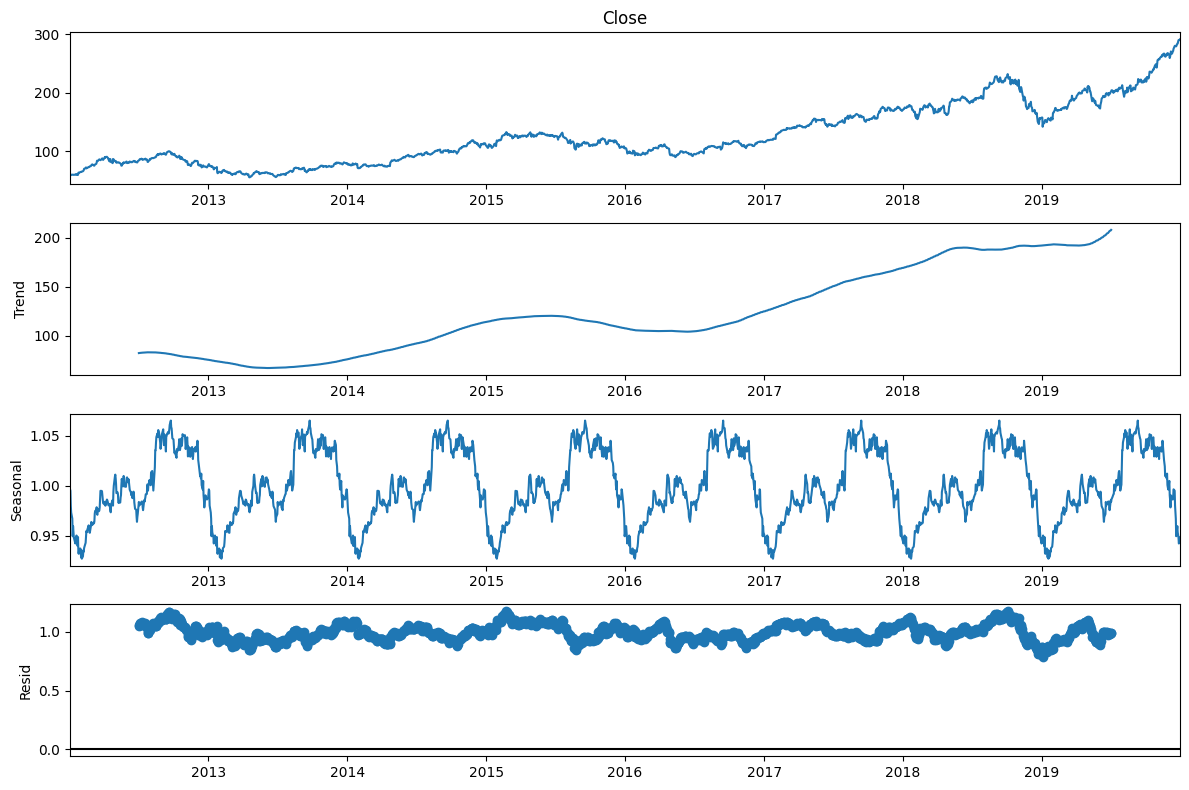

In [ ]:
# Multiplicative model decomposition (Yt = Trend * Seasonality * Noice)
decompose_multiplicative = seasonal_decompose(df_close['Close'], period=250, model='multiplicative' )
decompose_multiplicative.plot();
plt.rcParams['figure.figsize'] = (12, 8);

In [ ]:
decompose_multiplicative.resid.mean()

0.9961878425147728

In [ ]:
ljung_p = np.mean(ljung(x=decompose_multiplicative.resid.dropna()))[1].round(3)
print("Ljung Box, p value:", ljung_p, ", Residuals are uncorrelated" if ljung_p>0.05 else ", Residuals are Autocorrelated")

Ljung Box, p value: 0.0 , Residuals are Autocorrelated


**observations:**

In the above multiplicative decomposition, the trend is linear but the residuals are Autocorrelated like in the case of additive decomposition!

The residuals are distributed about the value 1 not 0.

It looks Additive model is more appropriate for this time series!

#Checking for Stationarity

From the line plot, we can see an increasing trend means the series can not be Stationary!
To test stationarity we use Augmented Dickey Fuller test!

Over all Mean is: 126.74123461064147


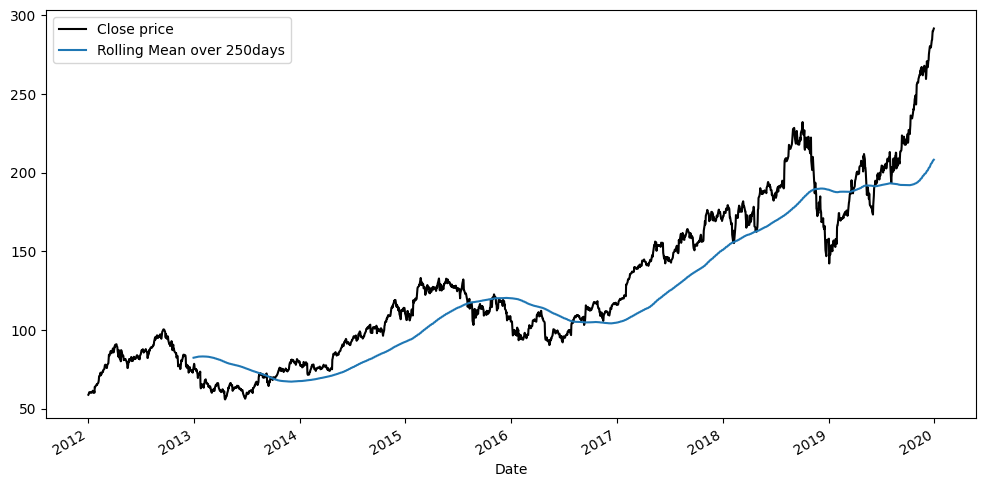

In [ ]:
# We use rolling mean of 250 days to see variation in mean over an year data
df_close['Close'].plot(figsize=(12,6), legend=True, label="Close price", cmap='gray')
df_close['Close'].rolling(250, center=False).mean().plot(legend=True, label="Rolling Mean over 250days");
print("Over all Mean is:", df_close['Close'].mean())
plt.show()

From the above plot, blue line shows mean value over 250 days which is changing from 100 to 200 over the years!

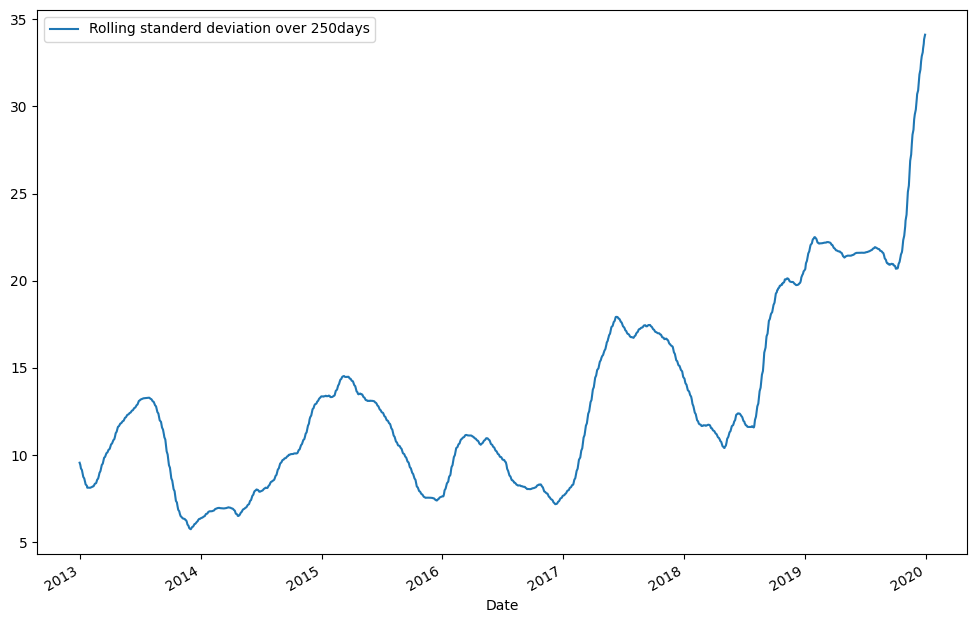

Over all Standerd deviation is: 50.57836882611924


In [ ]:
# We use rolling mean of 250 days to see variation in std over an year data
df_close['Close'].rolling(250, center=False).std().plot(legend=True, label="Rolling standerd deviation over 250days");
plt.show()
print("Over all Standerd deviation is:", df_close['Close'].std())

From the above plot, the rolling standerd deviation is also changing from 7 to 20 over the years!

In [ ]:
# ADF test for stationarity
from statsmodels.tsa.stattools import adfuller

In [ ]:
# test for stationarity
def adf_test(x):
    adf = adfuller(x.dropna())[1]
    return print(f"p value:{adf.round(4)}", ", Series is Stationary" if adf <0.05 else ", Series is Non-Stationary")

In [ ]:
adf = adfuller(df_close['Close'])[1]
print(f"p value:{adf.round(4)}", ", Series is Stationary" if adf <0.05 else ", Series is Non-Stationary")

p value:0.9961 , Series is Non-Stationary


**Observations:**

From the rolling statistics and adf test we can conclude that the series is NON-STATIONARY!!!

since the series is non stationary, we can not use it directly for model building.

The classic model for time series is ARIMA model which assumes stationarity, so need to make the series stationary before model building in other words we need to find the ARIMA parameter (d). 

To build ARIMA we need 3 parameters p,d,q.

d stands for differencing!

**3.2.7 AutoCorrelation plots**

**Autocorrelation plots used to find impact of past data on current data**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

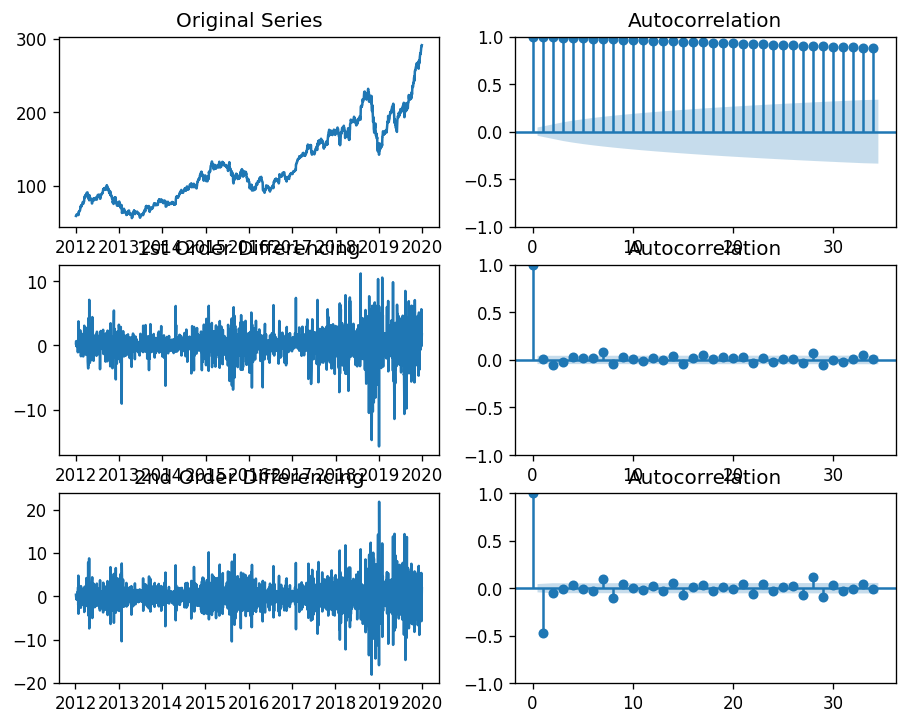

In [ ]:
# Original Series
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(df_close.Close); axes[0, 0].set_title('Original Series')
plot_acf(df_close.Close, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_close.Close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_close.Close.diff().dropna(), ax=axes[1, 1])

# # 2nd Differencing
axes[2, 0].plot(df_close.Close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_close.Close.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [ ]:
# test for stationarity of 1st difference
adf = adfuller(df_close.Close.diff().dropna())[1]
print(f"p value:{adf.round(4)}", ", Series is Stationary" if adf <0.05 else ", Series is Non-Stationary")


p value:0.0 , Series is Stationary


**Observations:**

From the ADF test on 1st difference(d=1), we can see that lag1 is significant and the all other lags are insignificant which implies Stationarity of the 1st differenced series.

So it suggests q = 1 for MA(Moving Avarage) d=1 for ARIMA(p,d,q)

Since we are NOT going to use d=2 series which is also makes the original series Stationary, because d=1 makes the original series Stationary!  

**Order of MA term(q)**

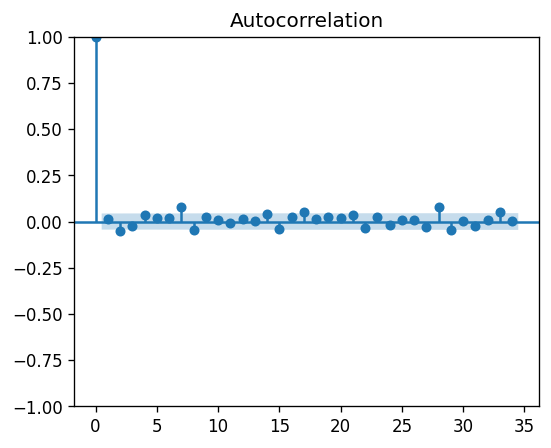

In [ ]:
plt.rcParams.update({'figure.figsize':(5,4), 'figure.dpi':120})
plot_acf(df_close.Close.diff().dropna())
plt.show()

**There is One significant lag well above the confidence i.e. at lag1 hence q = 1**

**To find order of AR term(p)**

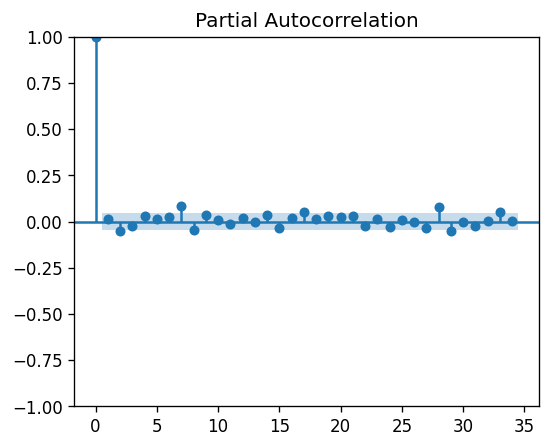

In [ ]:
plt.rcParams.update({'figure.figsize':(5,4), 'figure.dpi':120})
plot_pacf(df_close.Close.diff().dropna())
plt.show()

**There is ONE lag  significantly above the confidence level so we can take p=1 for AR(Autoregressive Model)**

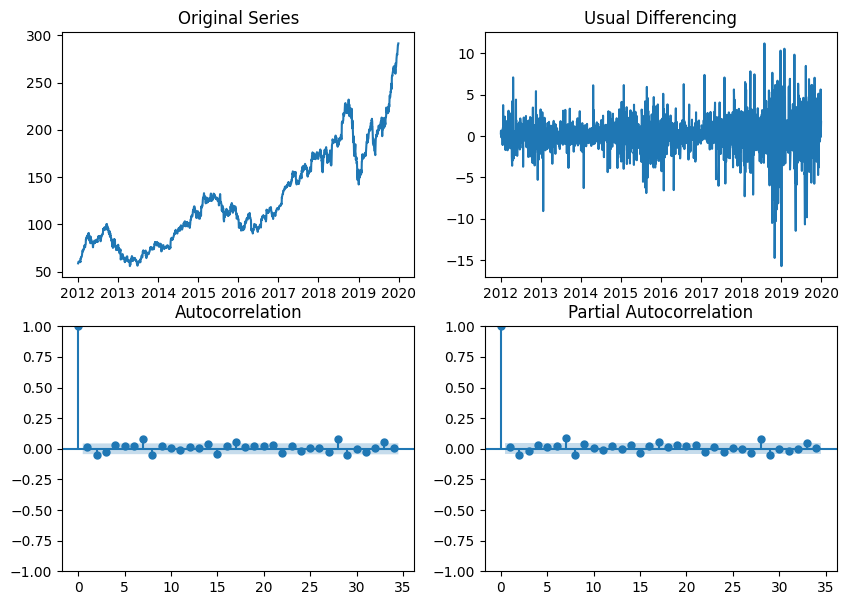

In [ ]:
# plot spcifications
fig, axes = plt.subplots(2, 2, figsize=(10,7), dpi=100)

# 1st differencing to make series stationary
axes[0,0].plot(df_close['Close'], label='Original Series')
axes[0,0].set_title('Original Series')
axes[0,1].plot(df_close['Close'].diff(1), label='Usual Differencing')
axes[0,1].set_title('Usual Differencing')

plot_acf(df_close.Close.diff().dropna(),ax=axes[1,0])
plot_pacf(df_close.Close.diff().dropna(), ax=axes[1,1])
plt.show()

**We can see an increasing varience at the end of the 1st differenced time series, means varience is not stabilized.**

**To stabilize varience, we need to do log transform to the original Close price data.**

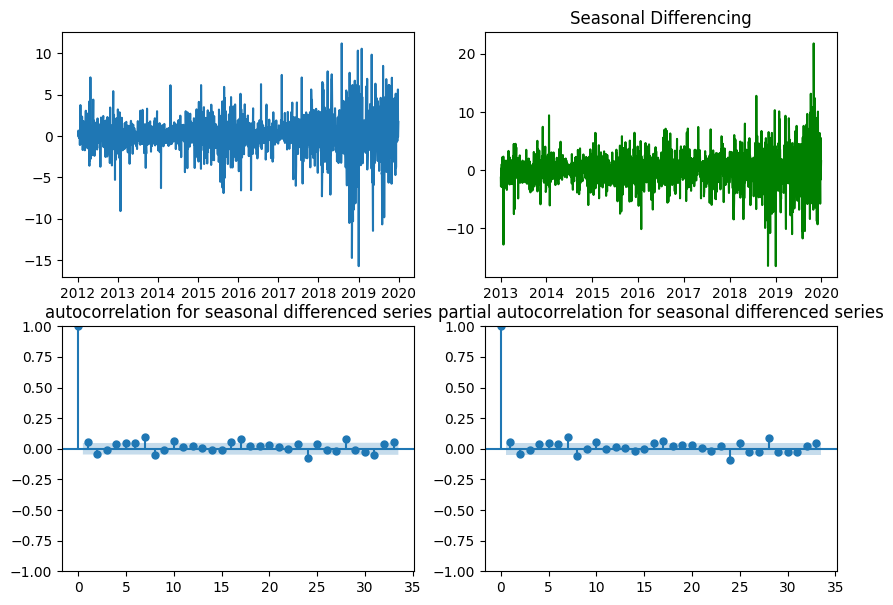

In [ ]:
# plot spcifications
fig, axes = plt.subplots(2, 2, figsize=(10,7), dpi=100)

#seasonal differencing on 1st differenced series
axes[0,0].plot(df_close['Close'].diff(), label='1st difference Series')
axes[0,1].plot(df_close['Close'].diff().diff(250), label='Seasonal Differencing', color='green')
axes[0,1].set_title('Seasonal Differencing')

plot_acf(df_close.Close.diff().diff(250).dropna(),ax=axes[1,0], title='autocorrelation for seasonal differenced series')
plot_pacf(df_close.Close.diff().diff(250).dropna(), ax=axes[1,1], title='partial autocorrelation for seasonal differenced series')
plt.show()

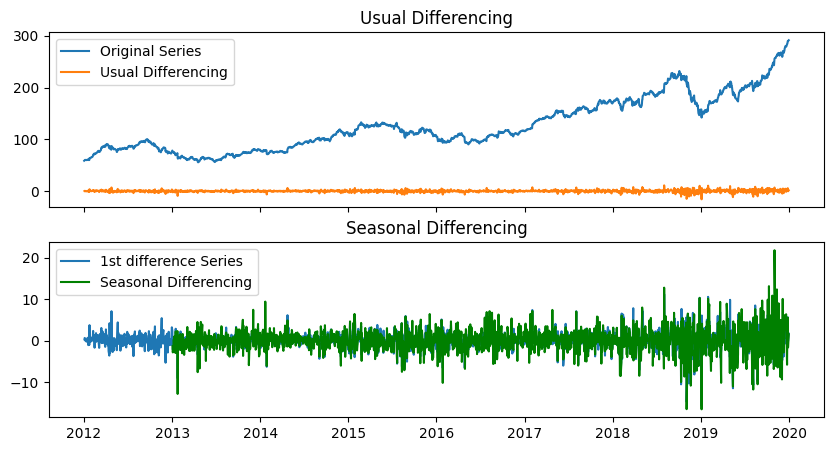

In [ ]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(df_close['Close'], label='Original Series')
axes[0].plot(df_close['Close'].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)

# Seasonal difference
axes[1].plot(df_close['Close'].diff(), label='1st difference Series')
axes[1].plot(df_close['Close'].diff().diff(250), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [ ]:
# test for stationarity of seasonal difference
adf = adfuller(df_close.Close.diff().diff(250).dropna())[1]
print(f"p value:{adf.round(4)}", ", Series is Stationary" if adf <0.05 else ", Series is Non-Stationary")


p value:0.0 , Series is Stationary


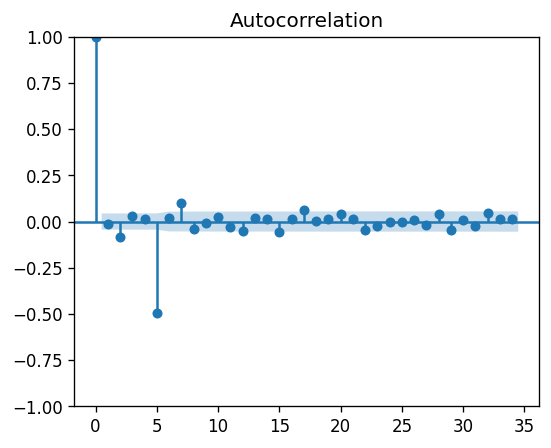

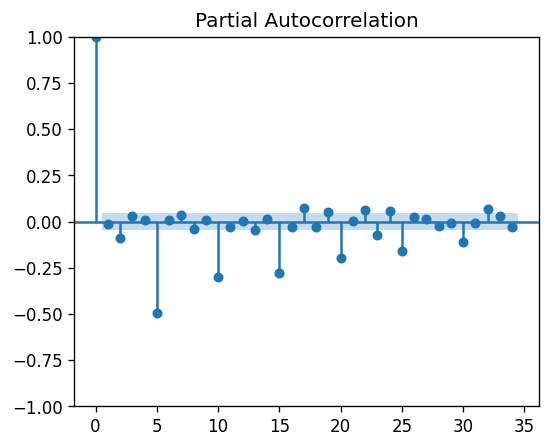

p value:0.0 , Series is Stationary


In [ ]:
# Checking P,D,Q for SARIMA for week wise seasonality of 5 days
plt.rcParams.update({'figure.figsize':(5,4), 'figure.dpi':120})
plot_acf(df_close.Close.diff().diff(5).dropna())
plt.show()

plt.rcParams.update({'figure.figsize':(5,4), 'figure.dpi':120})
plot_pacf(df_close.Close.diff().diff(5).dropna())
plt.show()

adf_test(df_close.Close.diff().diff(5))

**Suggesting SARIMA(0,1,0)(30,0,5,5)**

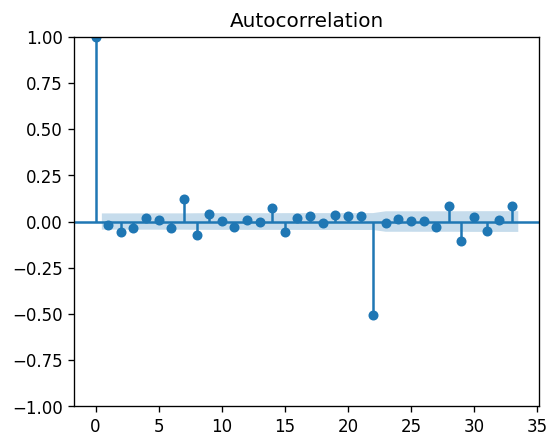

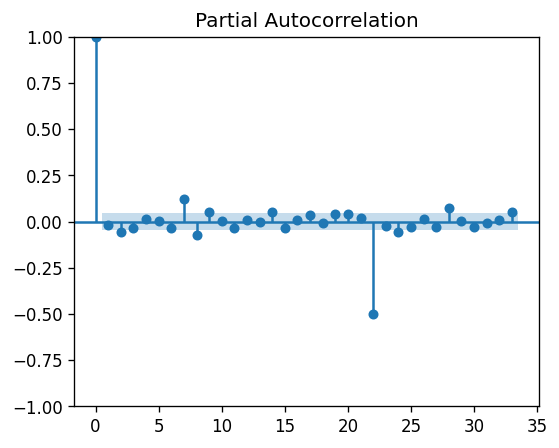

p value:0.0 , Series is Stationary


In [ ]:
# Checking P,D,Q for SARIMA for month wise seasonality of 22 days
plt.rcParams.update({'figure.figsize':(5,4), 'figure.dpi':120})
plot_acf(df_close.Close.diff().diff(22).dropna())
plt.show()

plt.rcParams.update({'figure.figsize':(5,4), 'figure.dpi':120})
plot_pacf(df_close.Close.diff().diff(22).dropna())
plt.show()

adf_test(df_close.Close.diff().diff(22))

**Sugesting SARIMA(0,1,0)(23,0,23,22)**

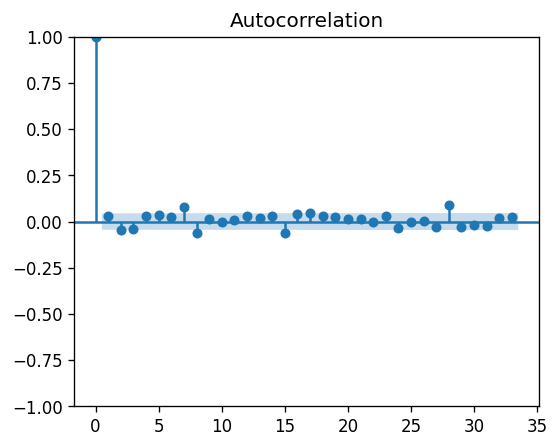

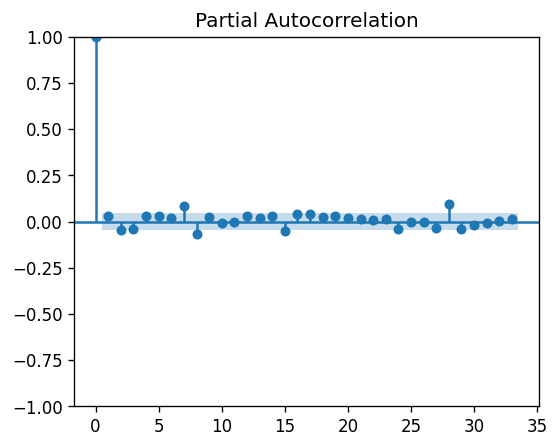

p value:0.0 , Series is Stationary


In [ ]:
# Checking P,D,Q for SARIMA for quarter wise seasonality of 66 days
plt.rcParams.update({'figure.figsize':(5,4), 'figure.dpi':120})
plot_acf(df_close.Close.diff().diff(66).dropna())
plt.show()

plt.rcParams.update({'figure.figsize':(5,4), 'figure.dpi':120})
plot_pacf(df_close.Close.diff().diff(66).dropna())
plt.show()

adf_test(df_close.Close.diff().diff(66))

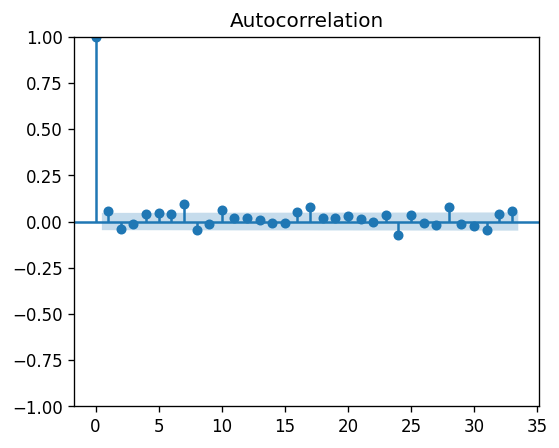

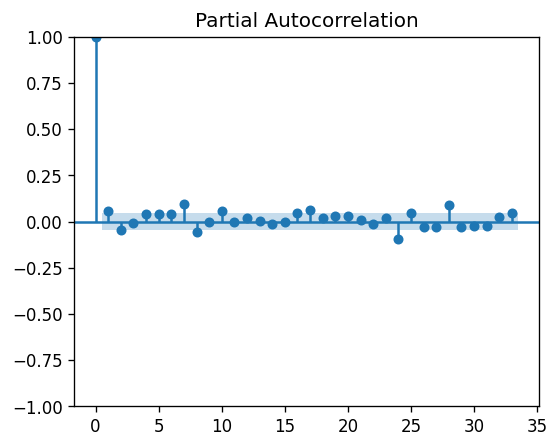

p value:0.0 , Series is Stationary


In [ ]:
# Checking P,D,Q for SARIMA for year wise seasonality of 250 days
plt.rcParams.update({'figure.figsize':(5,4), 'figure.dpi':120})
plot_acf(df_close.Close.diff().diff(250).dropna())
plt.show()

plt.rcParams.update({'figure.figsize':(5,4), 'figure.dpi':120})
plot_pacf(df_close.Close.diff().diff(250).dropna())
plt.show()

adf_test(df_close.Close.diff().diff(250))

**3.2.8 Sationarity checking, 1st differencing, ACF & PACF plots for Log transformed data**

p value:0.9291 , Series is Non-Stationary


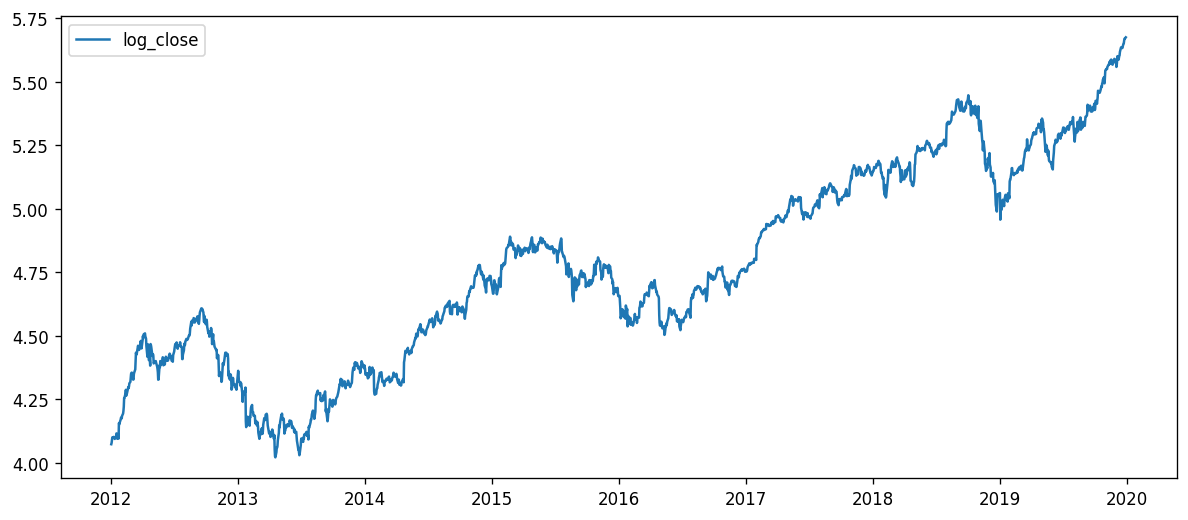

In [ ]:
# Sationarity checking
adf_test(df_close['log_close'])
plt.figure(figsize=(12,5))
plt.plot(df_close['log_close'], label = 'log_close')
# plt.plot(df_close['Close'], label='org')
plt.legend(loc='best')
plt.show()

p value:0.0 , Series is Stationary


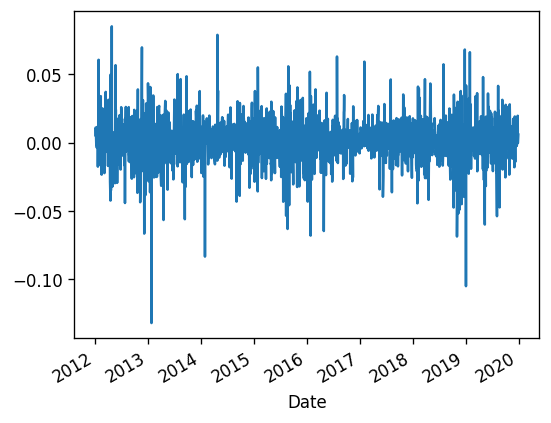

In [ ]:
# 1st differencing to make series stationary
adf_test(df_close['log_close'].diff())
df_close['log_close'].diff().plot()
plt.show()

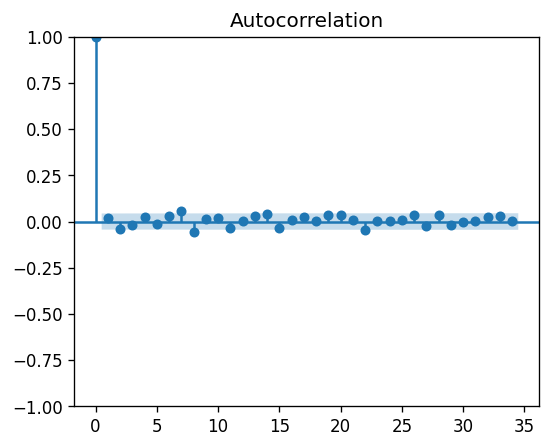

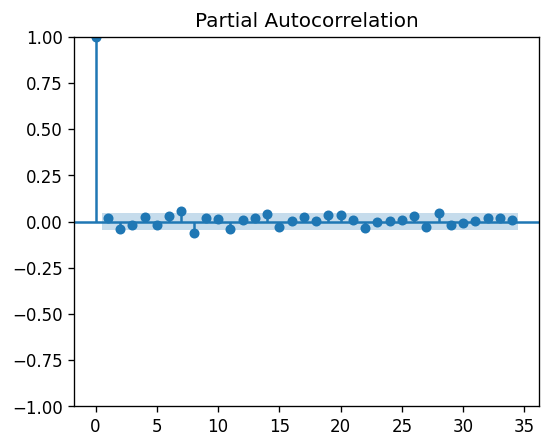

In [ ]:
# ACF & PACF plots 1s differenced log_close
plot_acf(df_close['log_close'].diff().dropna()), plot_pacf(df_close['log_close'].diff().dropna())
plt.show()
# suggesting ARIMA(0,1,0)

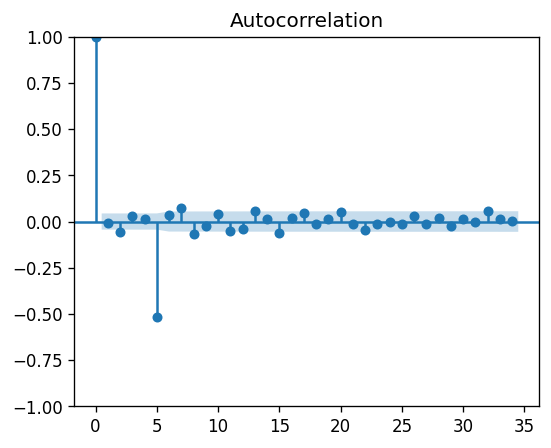

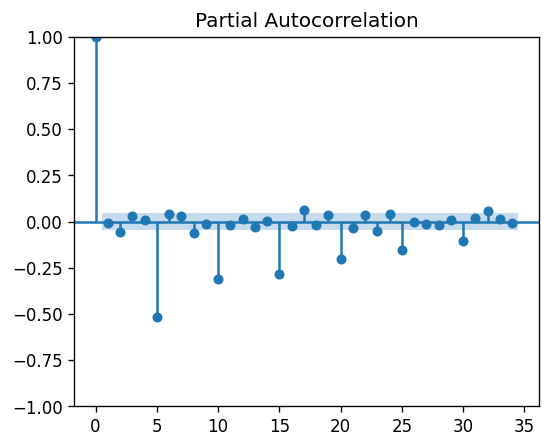

p value:0.0 , Series is Stationary


In [ ]:
# seasonal differencing of lof_close
# Checking P,D,Q for SARIMA for day wise seasonality of 5 days
plt.rcParams.update({'figure.figsize':(5,4), 'figure.dpi':120})
plot_acf(df_close.log_close.diff().diff(5).dropna())
plt.show()

plt.rcParams.update({'figure.figsize':(5,4), 'figure.dpi':120})
plot_pacf(df_close.log_close.diff().diff(5).dropna())
plt.show()

adf_test(df_close.log_close.diff().diff(5))

**sugesting SARIMA(0,1,0)(5,0,5,5) with log_close data.**

## 4. Data Preparation

In [ ]:
2011-251

1760

In [ ]:
train_data = df_close[:1760]
test_data  = df_close[1760:]
print(train_data.shape)
train_data.head()

(1760, 10)


,Close,log_close,Date,day,week,month,quarter,year,t,t_squared
Date,,,,,,,,,,
2012-01-03,58.747143,4.073243,2012-01-03,3,1,Jan,1,2012,1,1
2012-01-04,59.062859,4.078602,2012-01-04,4,1,Jan,1,2012,2,4
2012-01-05,59.718571,4.089643,2012-01-05,5,1,Jan,1,2012,3,9
2012-01-06,60.342857,4.100043,2012-01-06,6,1,Jan,1,2012,4,16
2012-01-09,60.247143,4.098455,2012-01-09,9,2,Jan,1,2012,5,25


## 5. Stock price prediction Time Series Forecasting Models

In [ ]:
# Defing Evaluation metrics RMSE & MAPE

def rmse(y, y_pred):
    return np.sqrt(np.mean((np.array(y)-np.array(y_pred))**2))

def mape(true_values, forecast_values): 
    true_values, forecast_values = np.array(true_values), np.array(forecast_values)
    return np.mean(np.abs((true_values - forecast_values) / true_values)) * 100


### 5.1 Data Driven Method

*The given time series has a Trend and Noise...So we can model the series with Holt's Exponential Smoothing*

In [ ]:
# Libraries for data driven approach
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES, No trend only Level component
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing Trend and Level componets
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Level+Trend+seasonality

**5.2.1 Simple Moving Avarage method**

In [ ]:
plt.figure(figsize=(12,4))
train_data.Close.plot(label="org")
list1 = [22,66,250]
for i in list1:
    df_close["Close"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best') 
test_data['Close'].plot(label= 'original test data')
plt.legend(loc='best') 
plt.show()
# simple avarage of rolling window 22 captures most of the pattern in the train and test data!

Simple Moving Avarage
MAPE 3.92
RMSE 9.34


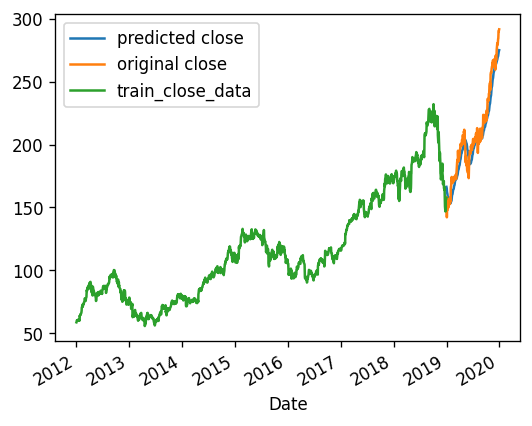

In [ ]:
# Simple Moving Avarage
# mape
print("Simple Moving Avarage")
print( 'MAPE',mape(test_data['Close'], df_close['Close'].rolling(22).mean()[1760:]).round(2))
print( 'RMSE',rmse(test_data['Close'], df_close['Close'].rolling(22).mean()[1760:]).round(2))
# ploting
df_close['Close'].rolling(22).mean()[1759:].plot(label='predicted close')
test_data['Close'].plot(label='original close')
train_data['Close'].plot(label='train_close_data')
plt.legend(loc='best')
plt.show()


**5.1.2 simple Exponential Smoothing**

Simple Exponential Smoothing (alpha=0.6)
BIC 2630.0
MAPE 22.93
RMSE 61.29


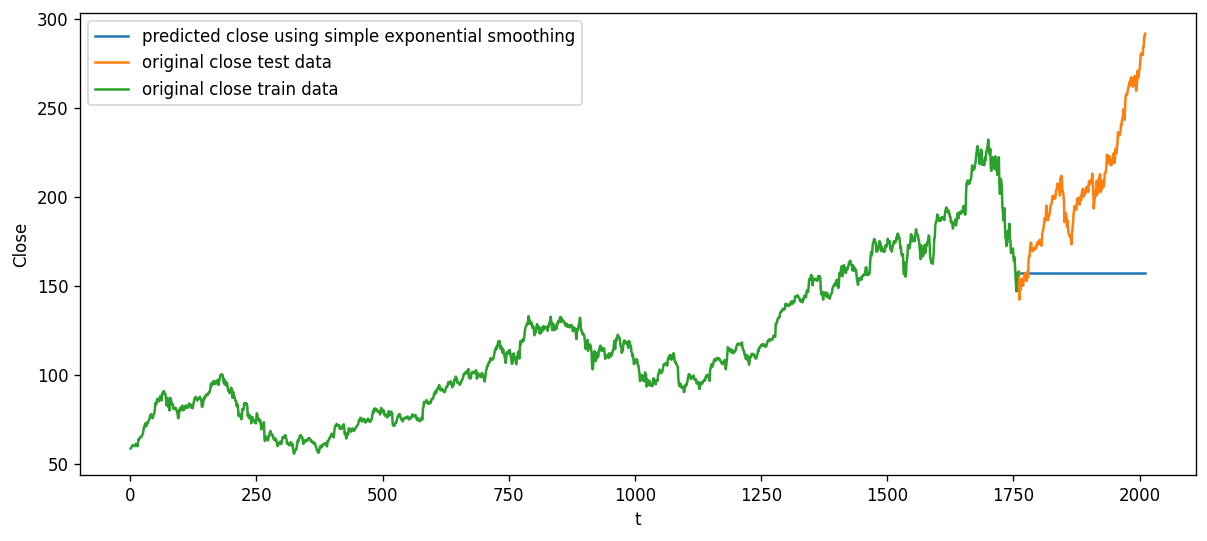

In [ ]:
print('Simple Exponential Smoothing (alpha=0.6)')
ses_model = SimpleExpSmoothing(train_data["Close"]).fit(smoothing_level=0.6)
pred_ses = ses_model.predict(start = test_data.t[0],end = test_data.t[-1])
print('BIC' ,ses_model.bic.round(0))
print('MAPE', mape(test_data['Close'],pred_ses).round(2))
print('RMSE',rmse(test_data['Close'],pred_ses).round(2))

# ploting
plt.figure(figsize=(12,5))
pred_ses.plot(label='predicted close using simple exponential smoothing')
sns.lineplot(data = test_data, x= 't',y= 'Close',label='original close test data')
sns.lineplot(data = train_data, x= 't',y= 'Close',label='original close train data')
plt.legend(loc='best')
plt.show()

**5.1.3 Holt's Exponential Smoothing**

*Used for Time series with Trend,  Leval and Noise*

Holt's Exponential Smoothing (alpha=0.6, beta=0.275)
BIC 2742.0
MAPE 4.96
RMSE 13.88


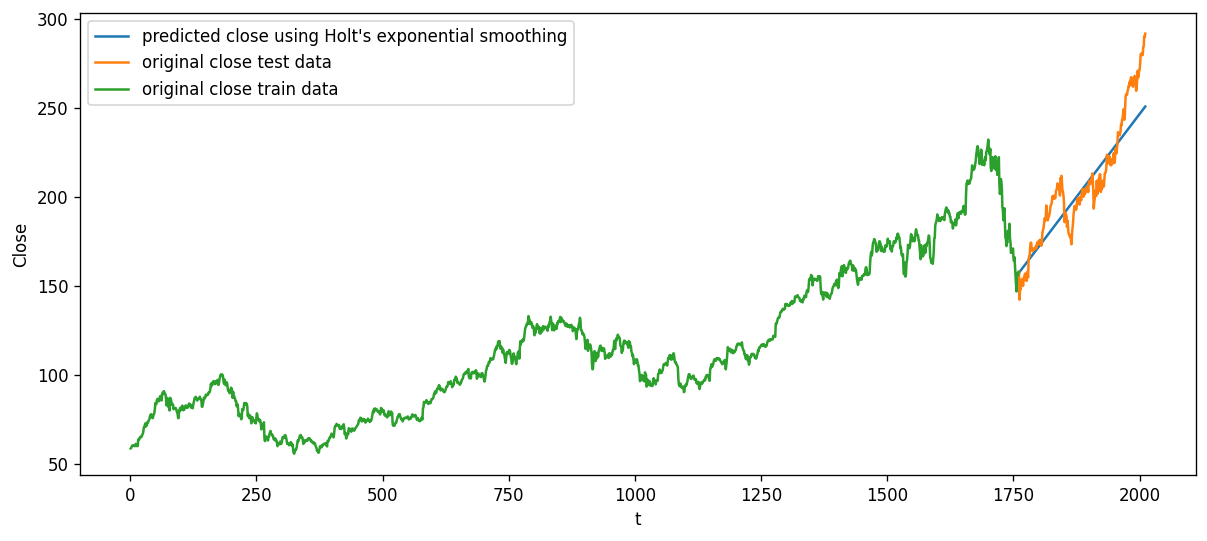

In [ ]:
print('Holt\'s Exponential Smoothing (alpha=0.6, beta=0.275)')
holt_model = Holt(train_data["Close"]).fit(smoothing_level=0.6, smoothing_slope=0.275)
pred_holt = holt_model.predict(start = test_data.t[0],end = test_data.t[-1])
print('BIC' ,holt_model.bic.round(0))
print('MAPE', mape(test_data['Close'],pred_holt).round(2))
print('RMSE',rmse(test_data['Close'],pred_holt).round(2))

# ploting
plt.figure(figsize=(12,5))
pred_holt.plot(label='predicted close using Holt\'s exponential smoothing')
sns.lineplot(data = test_data, x= 't',y= 'Close',label='original close test data')
sns.lineplot(data = train_data, x= 't',y= 'Close',label='original close train data')
plt.legend(loc='best')
plt.show()

**5.1.4 Holt-Winter Double Exponential Smoothing**

*Used for Time series with Trend,  Leval, Seasonality and Noise*

Holt-Winter Exponential Smoothing
BIC 2790.0
MAPE 5.17
RMSE 12.65


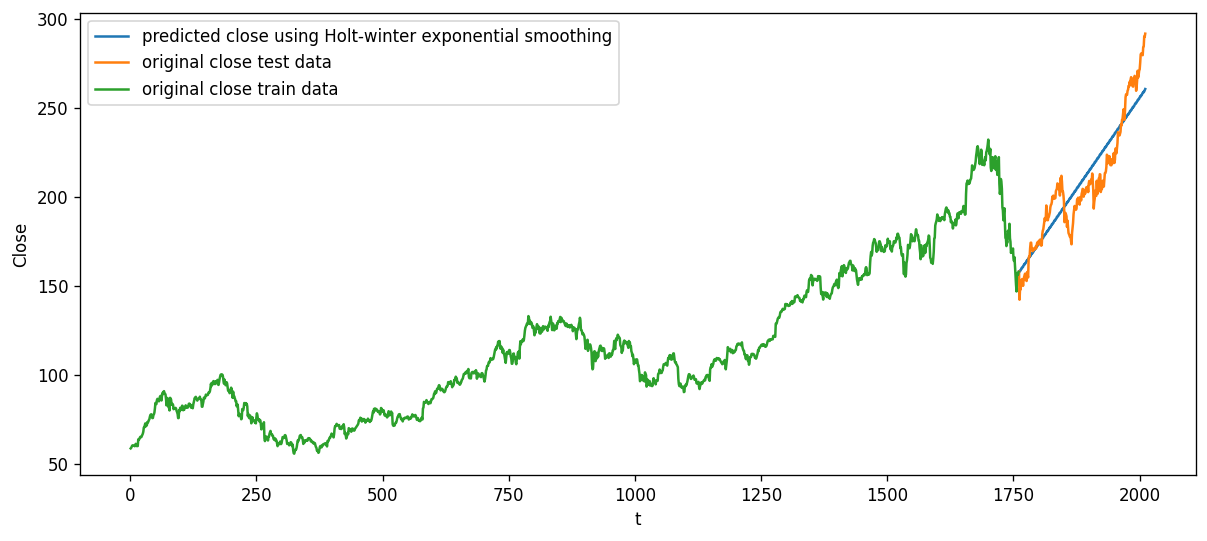

In [ ]:
print('Holt-Winter Exponential Smoothing')

hw_model = ExponentialSmoothing(train_data["Close"], 
                                seasonal="add",
                                trend="add",
                                seasonal_periods=5).fit(smoothing_level=0.6, 
                                                        smoothing_slope=0.275, 
                                                        smoothing_seasonal=0.01)

pred_hw  = hw_model.predict(start = test_data.t[0],end = test_data.t[-1])
print('BIC' ,hw_model.bic.round(0))
print('MAPE', mape(test_data['Close'],pred_hw).round(2))
print('RMSE',rmse(test_data['Close'],pred_hw).round(2))

# ploting
plt.figure(figsize=(12,5))
pred_hw.plot(label='predicted close using Holt-winter exponential smoothing')
sns.lineplot(data = test_data, x= 't',y= 'Close',label='original close test data')
sns.lineplot(data = train_data, x= 't',y= 'Close',label='original close train data')
plt.legend(loc='best')
plt.show()

### 5.2 ARIMA &SARIMA models

In [ ]:
 from statsmodels.tsa.arima.model import ARIMA
 import warnings
 warnings.filterwarnings("ignore")

Seasonal ARIMA (0,1,0)(5,1,5,5)
BIC 7379.0
MAPE 19.19
RMSE 52.12


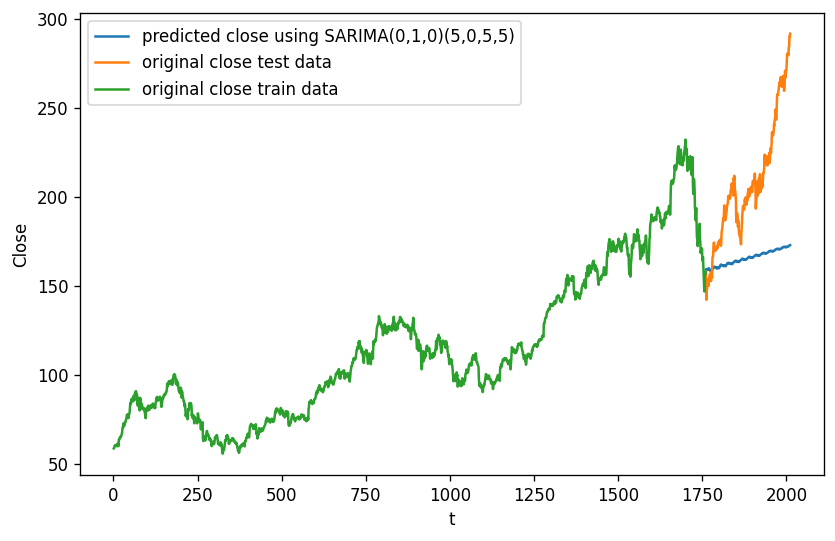

In [ ]:
 # # SARIMA(0,1,0)(5,1,5,5)
 print('Seasonal ARIMA (0,1,0)(5,1,5,5)')
 sarima_1 = ARIMA(train_data['Close'], order=(4,1,0), seasonal_order=(5, 1, 5, 5) )
 sarima_model_1 = sarima_1.fit()
 pred_sm1  = sarima_model_1.predict(start = test_data.t[0],end = test_data.t[-1])

 print('BIC' ,sarima_model_1.bic.round(0))
 print('MAPE', mape(test_data['Close'],pred_sm1).round(2))
 print('RMSE',rmse(test_data['Close'],pred_sm1).round(2))

 # ploting
 plt.figure(figsize=(8,5))
 pred_sm1.plot(label='predicted close using SARIMA(0,1,0)(5,0,5,5)')
 sns.lineplot(data = test_data, x= 't',y= 'Close',label='original close test data')
 sns.lineplot(data = train_data, x= 't',y= 'Close',label='original close train data')
 plt.legend(loc='best')
 plt.show()

Here our predicted close using SARIMA value comes between 150 to 200

In [ ]:
 # # SARIMA(0,1,0)(23,0,23,22)
 print('Seasonal ARIMA (0,1,0)(23,0,23,22)')
 sarima_2 = ARIMA(train_data['Close'], order=(0,1,0), seasonal_order=(23, 0, 23, 22) )
 sarima_model_2 = sarima_2.fit()
 pred_sm2  = sarima_model_2.predict(start = test_data.t[0],end = test_data.t[-1])

 print('BIC' ,sarima_model_2.bic.round(0))
 print('MAPE', mape(test_data['Close'],pred_sm2).round(2))
 print('RMSE',rmse(test_data['Close'],pred_sm2).round(2))

 # ploting
 plt.figure(figsize=(12,5))
 pred_sm2.plot(label='predicted close using SARIMA(0,1,0)(5,0,5,5)')
 sns.lineplot(data = test_data, x= 't',y= 'Close',label='original close test data')
 sns.lineplot(data = train_data, x= 't',y= 'Close',label='original close train data')
 plt.legend(loc='best')
 plt.show()

In [ ]:
 # # SARIMA(0,1,0)(23,0,23,22)
 print('Seasonal ARIMA (0,1,0)(23,0,23,22) using log_close')
 sarima_3 = ARIMA(train_data['log_close'], order=(0,1,0), seasonal_order=(23, 0, 23, 22) )
 sarima_model_3 = sarima_3.fit()
 pred_sm3  = sarima_model_3.predict(start = test_data.t[0],end = test_data.t[-1])

 print('BIC' ,sarima_model_3.bic.round(0))
 print('MAPE', mape(test_data['Close'],pred_sm3).round(2))
 print('RMSE',rmse(test_data['Close'],pred_sm3).round(2))

 # ploting
 plt.figure(figsize=(12,5))
 pred_sm3.plot(label='predicted log_close using SARIMA(0,1,0)(5,0,5,5)')
 sns.lineplot(data = test_data, x= 't',y= 'log_close',label='original close test data')
 sns.lineplot(data = train_data, x= 't',y= 'log_close',label='original close train data')
 plt.legend(loc='best')
# plt.show()

Seasonal ARIMA (0,1,0)(5,1,5,5) using log_close
BIC -9469.0
MAPE 5.05
RMSE 0.31


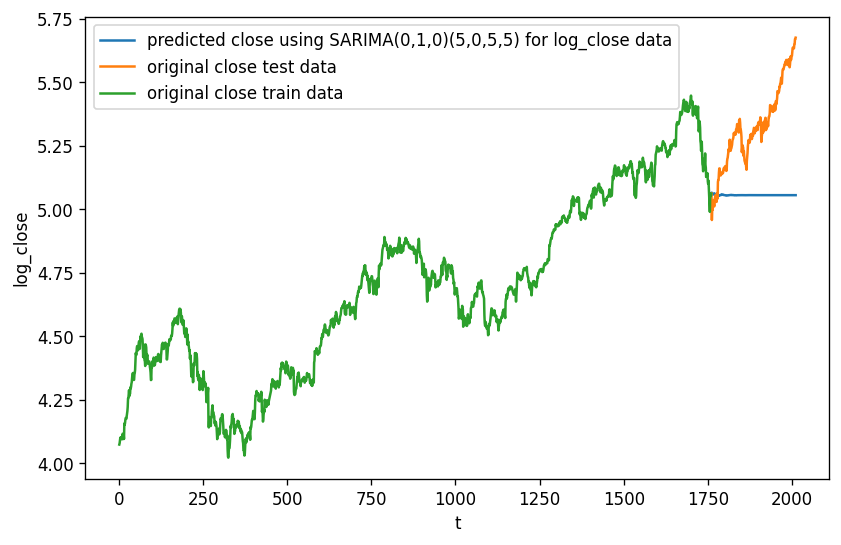

In [ ]:
 # # SARIMA(0,1,0)(5,0,5,5)
 print('Seasonal ARIMA (0,1,0)(5,1,5,5) using log_close')
 sarima_4 = ARIMA(train_data['log_close'], order=(0,1,0), seasonal_order=(5, 0, 5, 5) )
 sarima_model_4 = sarima_4.fit()
 pred_sm4  = sarima_model_4.predict(start = test_data.t[0],end = test_data.t[-1])

 print('BIC' ,sarima_model_4.bic.round(0))
 print('MAPE', mape(test_data['log_close'],pred_sm4).round(2))
 print('RMSE',rmse(test_data['log_close'],pred_sm4).round(2))

 # ploting
 plt.figure(figsize=(8,5))
 pred_sm4.plot(label='predicted close using SARIMA(0,1,0)(5,0,5,5) for log_close data')
 sns.lineplot(data = test_data, x= 't',y= 'log_close',label='original close test data')
 sns.lineplot(data = train_data, x= 't',y= 'log_close',label='original close train data')
 plt.legend(loc='best')
 plt.show()

Here our predicted close using SARIMA value comes between 5.00 - 5.25 for log close column

In [ ]:
 # ARIMA(1,1,1)
 print("ARIMA(1,1,1) Model")
 arima_111 = ARIMA(train_data['Close'], 
                     order=(1,1,1),
                     seasonal_order=(0, 0, 0, 0) )
 arima_111_model = arima_111.fit()
 pred_am1  = arima_111_model.predict(start = test_data.t[0],end = test_data.t[-1])

 print('BIC' ,arima_111_model.bic.round(0))
 print('MAPE', mape(test_data['Close'],pred_am1).round(2))
 print('RMSE',rmse(test_data['Close'],pred_am1).round(2))

 # ploting
 plt.figure(figsize=(12,5))
 pred_am1.plot(label='predicted close using ARIMA(1,1,1)')
 sns.lineplot(data = test_data, x= 't',y= 'Close',label='original close test data')
 sns.lineplot(data = train_data, x= 't',y= 'Close',label='original close train data')
 plt.legend(loc='best')
 plt.show()

In [ ]:
 # AR(1) Model/ ARIMA(1,1,0)
 print('AR(1/ ARIMA(1,1,0) Model')
 arima_110 = ARIMA(train_data['Close'], 
                     order=(1,1,0),
                     seasonal_order=(0, 0, 0, 0) )
 arima_110_model = arima_110.fit()
 pred_am2  = arima_110_model.predict(start = test_data.t[0],end = test_data.t[-1])

 print('BIC' ,arima_110_model.bic.round(0))
 print('MAPE', mape(test_data['Close'],pred_am2).round(2))
 print('RMSE',rmse(test_data['Close'],pred_am2).round(2))

 # ploting
 plt.figure(figsize=(12,5))
 pred_am2.plot(label='predicted close using ARIMA(1,1,0)/ AR(1)')
 sns.lineplot(data = test_data, x= 't',y= 'Close',label='original close test data')
 sns.lineplot(data = train_data, x= 't',y= 'Close',label='original close train data')
 plt.legend(loc='best')
 plt.show()

In [ ]:
 # SARIMA(0,1,0)
 sarima_010_010_250       = ARIMA(train_data, 
                                  order=(0,1,0),
                                  seasonal_order=(0, 1, 0, 250) )
 sarima_010_010_250_model = sarima_010_010_250.fit()
 sarima_010_010_250_model.summary()

### 5.3 Hybrid Model - Theta Model

The hybrid Theta model combines the Theta method and the ARIMA model by first using the Theta method to forecast the trend component of the data, and then using the ARIMA model to model the residuals (i.e., the difference between the actual values and the trend component). By combining the strengths of both methods, the hybrid Theta model can provide accurate forecasts for time series data with both linear and nonlinear trends, as well as seasonality.

Theta model for close data
MAPE 20.64
RMSE 55.62


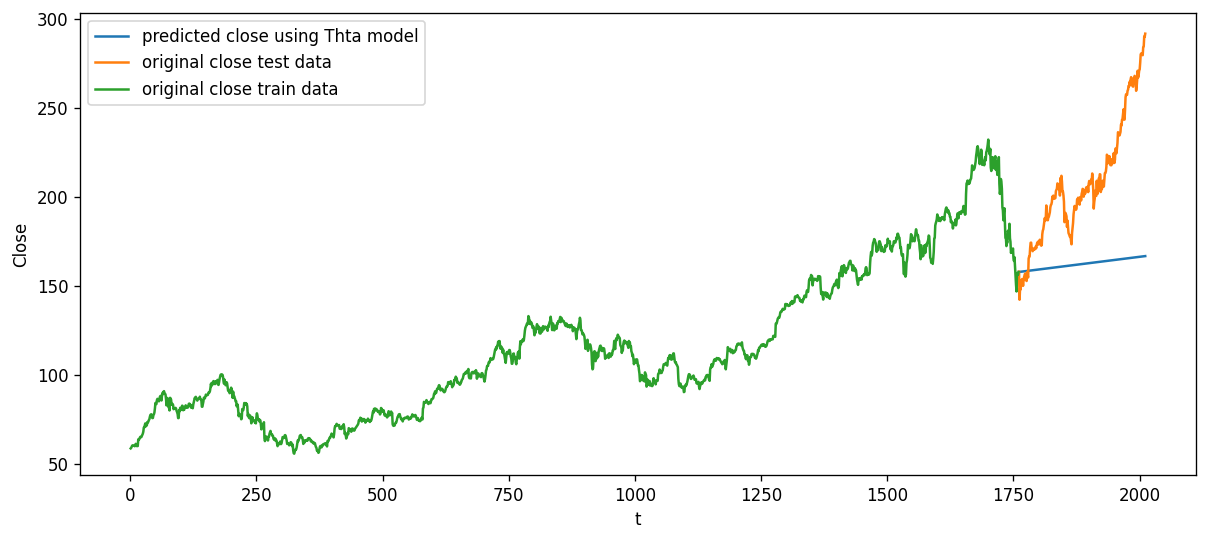

In [ ]:
from statsmodels.tsa.forecasting.theta import ThetaModel, ThetaModelResults

print('Theta model for close data')
theta_model = ThetaModel(train_data['Close'], deseasonalize=False)
theta_model = theta_model.fit()
pred_theta  = theta_model.forecast(251)
# ThetaModelResults()
# pred_theta = theta_model.predict(start = test_data.t[0],end = test_data.t[-1])

# print('BIC' ,theta_model.bic.round(0))
print('MAPE', mape(test_data['Close'],pred_theta).round(2))
print('RMSE',rmse(test_data['Close'],pred_theta).round(2))

# # ploting
plt.figure(figsize=(12,5))
pred_theta.plot(label='predicted close using Thta model')
sns.lineplot(data = test_data, x= 't',y= 'Close',label='original close test data')
sns.lineplot(data = train_data, x= 't',y= 'Close',label='original close train data')
plt.legend(loc='best')
plt.show()

So in our Theta model our predicted value is in approx $152 - $155  dollar